# Bölüm 1: Proje Başlangıcı & Veri Kontrolleri

In [81]:
import numpy as np  # NumPy kütüphanesini içe aktarıyoruz.
import pandas as pd  # Pandas kütüphanesini içe aktarıyoruz.
import seaborn as sns  # Seaborn kütüphanesini içe aktarıyoruz.
import matplotlib.pyplot as plt  # Matplotlib kütüphanesinden sadece pyplot modülünü içe aktarıyoruz.

from sklearn.model_selection import train_test_split  # scikit-learn kütüphanesinden train_test_split fonksiyonunu içe aktarıyoruz. Veriyi eğitim ve test kümelerine ayırmak için kullanacağız.
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Veriyi önişlemek için StandardScaler ve LabelEncoder'ı içe aktarıyoruz.
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier sınıflandırma algoritması için kullanacağız.
from sklearn.metrics import accuracy_score, classification_report  # Model değerlendirmek için kullanılacak metrikleri içe aktarıyoruz.
from sklearn.manifold import TSNE # Veri değerlendirmek için TSNE'yi içe aktarıyoruz.

In [56]:
# Eğitim verisi 'train.csv' dosyasını okuyarak bir Pandas veri tablosuna atıyoruz.
train_df = pd.read_csv('train.csv')

# Test verisi 'test_x.csv' dosyasını okuyarak bir Pandas veri tablosuna atıyoruz.
test_df = pd.read_csv('test_x.csv')

In [57]:
# Eğitim verisi tablosundaki her sütundaki eksik değerlerin sayısını hesaplayarak 'missing_values' adlı bir seri oluşturuyoruz.
missing_values = train_df.isnull().sum()

# Eğitim verisi tablosundaki 'Öbek İsmi' sütunundaki her bir öbeğin (değerin) sayısını hesaplayarak dağılımı 'target_distribution' adlı bir seri olarak elde ediyoruz.
target_distribution = train_df['Öbek İsmi'].value_counts()

# Eksik değerlerin sayısını ve 'Öbek İsmi' sütunundaki dağılımı döndürüyoruz.
missing_values, target_distribution


(index                                         0
 Cinsiyet                                      0
 Yaş Grubu                                     0
 Medeni Durum                                  0
 Eğitim Düzeyi                                 0
 İstihdam Durumu                               0
 Yıllık Ortalama Gelir                         0
 Yaşadığı Şehir                                0
 En Çok İlgilendiği Ürün Grubu                 0
 Yıllık Ortalama Satın Alım Miktarı            0
 Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
 Eğitime Devam Etme Durumu                     0
 Öbek İsmi                                     0
 Yıllık Ortalama Sepete Atılan Ürün Adedi      0
 dtype: int64,
 obek_4    720
 obek_8    717
 obek_5    706
 obek_3    695
 obek_7    695
 obek_1    692
 obek_6    688
 obek_2    547
 Name: Öbek İsmi, dtype: int64)

In [58]:
# Eğitim verisindeki ilk 20 satırını inceliyoruz.
train_df.head(20)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
5,5,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,332489.316371,Büyük Şehir,Giyim,9218.994557,56.626868,Etmiyor,obek_8,216.332207
6,6,Kadın,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,256538.898810,Kırsal,Ev ve Mobilya,6013.405491,15.929857,Etmiyor,obek_3,19.248434
7,7,Kadın,31-40,Bekar,Lise Mezunu,Kendi İşinin Sahibi,213630.355636,Küçük Şehir,Ev ve Mobilya,3960.361517,8.913887,Etmiyor,obek_5,102.394323
8,8,Erkek,51-60,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,479593.473447,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,39574.601258,25.685715,Etmiyor,obek_3,56.322893
9,9,Kadın,51-60,Evli,Üniversite Mezunu,Emekli,477359.775587,Küçük Şehir,Giyim,41555.832293,27.871027,Etmiyor,obek_6,44.838758


In [59]:
# "test_df" veri tablosundaki "index" sütununu kullanarak submission kimliklerini tanımlıyoruz.
submission_ids = test_df['index']

In [60]:
# Veri tablolarımızdaki 'index' sütununu çıkarıyoruz.
train_df.drop(columns=['index'], inplace=True)
test_df.drop(columns=['index'], inplace=True)

In [61]:
# "Öbek İsmi" sütununu çıkartarak eğitim veri tablosundan yeni bir veri tablosu oluşturuyoruz.
# Bu yeni veri tablosunu 'X' olarak adlandırılıyor ve "Öbek İsmi" sütunu olmadan diğer tüm sütunları içeriyor.
X = train_df.drop('Öbek İsmi', axis=1)

# "Öbek İsmi" sütununu 'y' olarak adlandırılan hedef değişkene tanımlıyoruz.
y = train_df['Öbek İsmi']

In [62]:
# Kategorik özellikleri belirtilen sütunlardan oluşturulan bir liste olarak tanımlıyoruz.
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']

# Bölüm 2: Veri Analizi

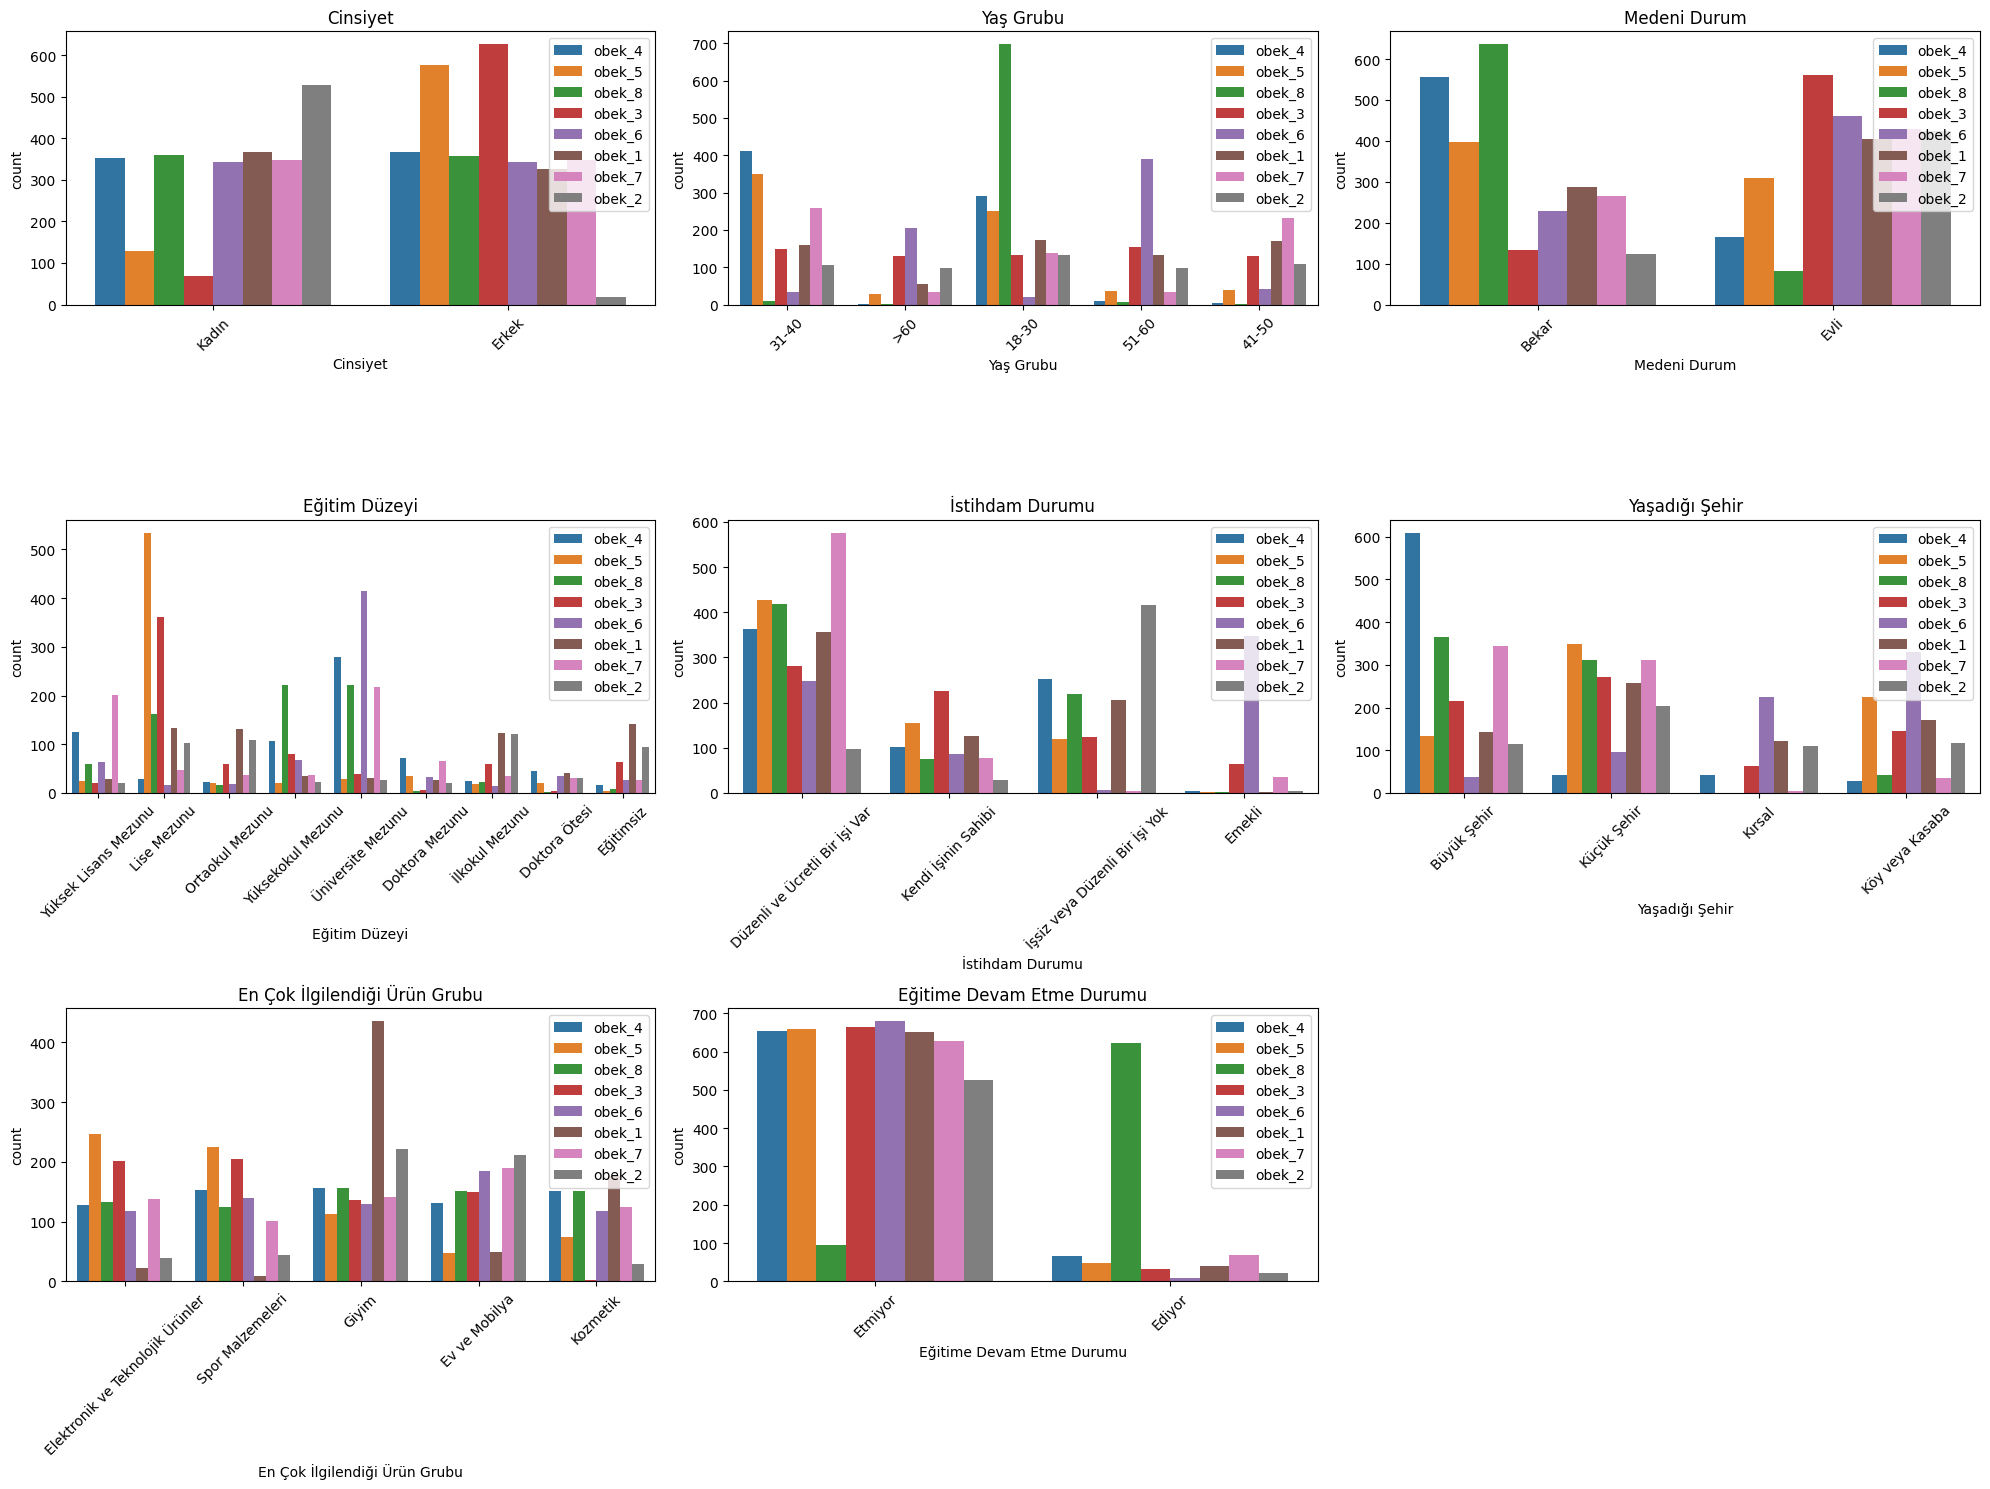

In [63]:
# Görselleştirme için orijinal eğitim ve doğrulama verilerini birleştiriyoruz.
# 'X' bağımsız değişkenleri ile 'y' hedef değişkenini birleştirerek bir görselleştirme veri tablosu oluşturuyoruz.
visual_data_original = pd.concat([X, y], axis=1)

# Kategorik özellikleri hedef değişkene karşı görselleştirmek için alt grafikler oluşturuyoruz.
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, idx)

    # Seaborn kütüphanesi kullanarak kategorik özellikleri hedef değişkene göre sayısal olarak görselleştiriyoruz.
    sns.countplot(data=visual_data_original, x=feature, hue='Öbek İsmi')

    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

# Grafiklerin düzenini ayarlıyoruz.
plt.tight_layout()
plt.show()


# Bölüm 3: Model Oluşturma ve Eğitimi

In [64]:
# Her bir kategorik özellik için bir LabelEncoder nesnesi oluşturuyoruz.
label_encoders = {}  # LabelEncoder nesnelerini saklamak için boş bir sözlük oluşturuyoruz.

for column in categorical_features:  # Her bir kategorik özellik için dönüyoruz.
    le = LabelEncoder()  # Yeni bir LabelEncoder nesnesi oluşturuyoruz.
    train_df[column] = le.fit_transform(train_df[column])  # Orijinal veriyi LabelEncoder ile dönüştürüyoruz.
    label_encoders[column] = le  # LabelEncoder nesnesini sözlüğe ekliyoruz.

In [65]:
# Her bir kategorik özellik için bir LabelEncoder nesnesi oluşturuyoruz.
label_encoders = {}  # LabelEncoder nesnelerini saklamak için boş bir sözlük oluşturuyoruz.

for column in categorical_features:  # Her bir kategorik özellik için dönüyoruz.
    le = LabelEncoder()  # Yeni bir LabelEncoder nesnesi oluşturuyoruz.
    test_df[column] = le.fit_transform(test_df[column])  # Test verisini LabelEncoder ile dönüştürüyoruz.
    label_encoders[column] = le  # LabelEncoder nesnesini sözlüğe ekliyoruz.

In [66]:
# Bir LabelEncoder nesnesi oluşturuyoruz ve hedef değişkeni (Öbek İsmi) için atama yapıyoruz.
target_encoder = LabelEncoder()  # Yeni bir LabelEncoder nesnesi oluşturuyoruz.
train_df['Öbek İsmi'] = target_encoder.fit_transform(train_df['Öbek İsmi'])  # Hedef değişkeni dönüştürüyoruz.

In [67]:
# Veriyi bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırma
X = train_df.drop('Öbek İsmi', axis=1)  # 'Öbek İsmi' sütununu çıkararak bağımsız değişkenleri 'X' olarak atıyoruz.
y = train_df['Öbek İsmi']  # Hedef değişkeni 'y' olarak atıyoruz.

# Özellikleri ölçeklendirme
scaler = StandardScaler()  # Veriyi ölçeklendirmek için StandardScaler nesnesi oluşturuyoruz.
X_scaled = scaler.fit_transform(X)  # Bağımsız değişkenleri ölçeklendiriyoruz ve 'X_scaled' olarak kaydediyoruz.

# Veriyi eğitim ve test kümelerine ayırma
# train_test_split fonksiyonunu kullanarak veriyi eğitim ve test kümelerine ayırıyoruz.
# test_size=0.01, verinin %1'ini test kümelerine ayıracağını belirtir.
# random_state=42, tekrarlanabilir sonuçlar için rastgelelik ayarıdır.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.01, random_state=42)

# Eğitim ve test kümesinin şeklini (boyutlarını) gösteriyoruz.
X_train.shape, X_test.shape

((5405, 12), (55, 12))

In [68]:
# Test verisini ölçeklendirme
test_data_scaled = scaler.transform(test_df)

In [69]:
# Sayısal özellikleri belirtilen sütunlardan oluşturulan bir liste olarak tanımlıyoruz.
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Bölüm 4: Modele Göre Detaylı Analiz

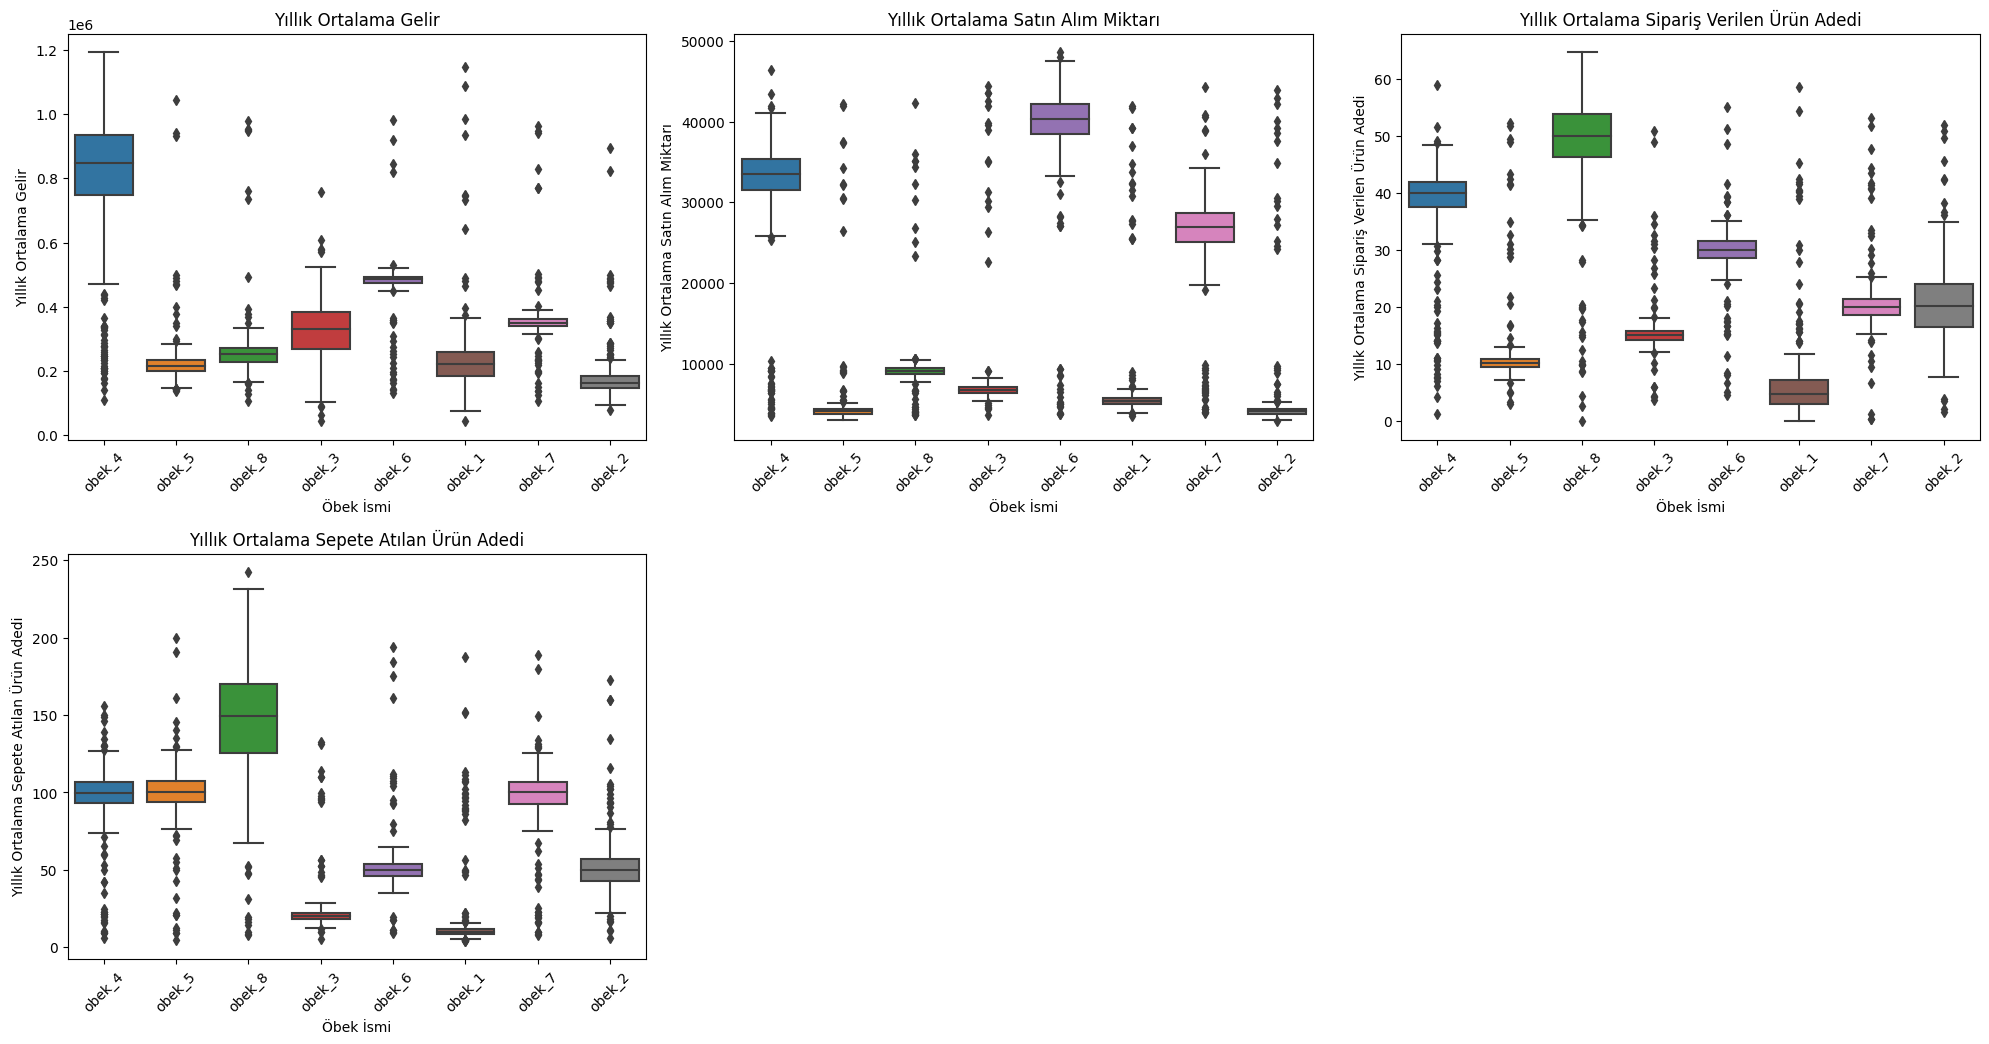

In [70]:
# Sayısal özellikleri hedef değişkene karşı görselleştirmek için alt grafikler oluşturuyoruz.
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, idx)

    # Seaborn kütüphanesi kullanarak sayısal özellikleri hedef değişkene göre kutu grafiği olarak görselleştiriyoruz.
    sns.boxplot(data=visual_data_original, x='Öbek İsmi', y=feature)

    plt.title(feature)
    plt.xticks(rotation=45)

# Grafiklerin düzenini ayarlıyoruz.
plt.tight_layout()
plt.show()


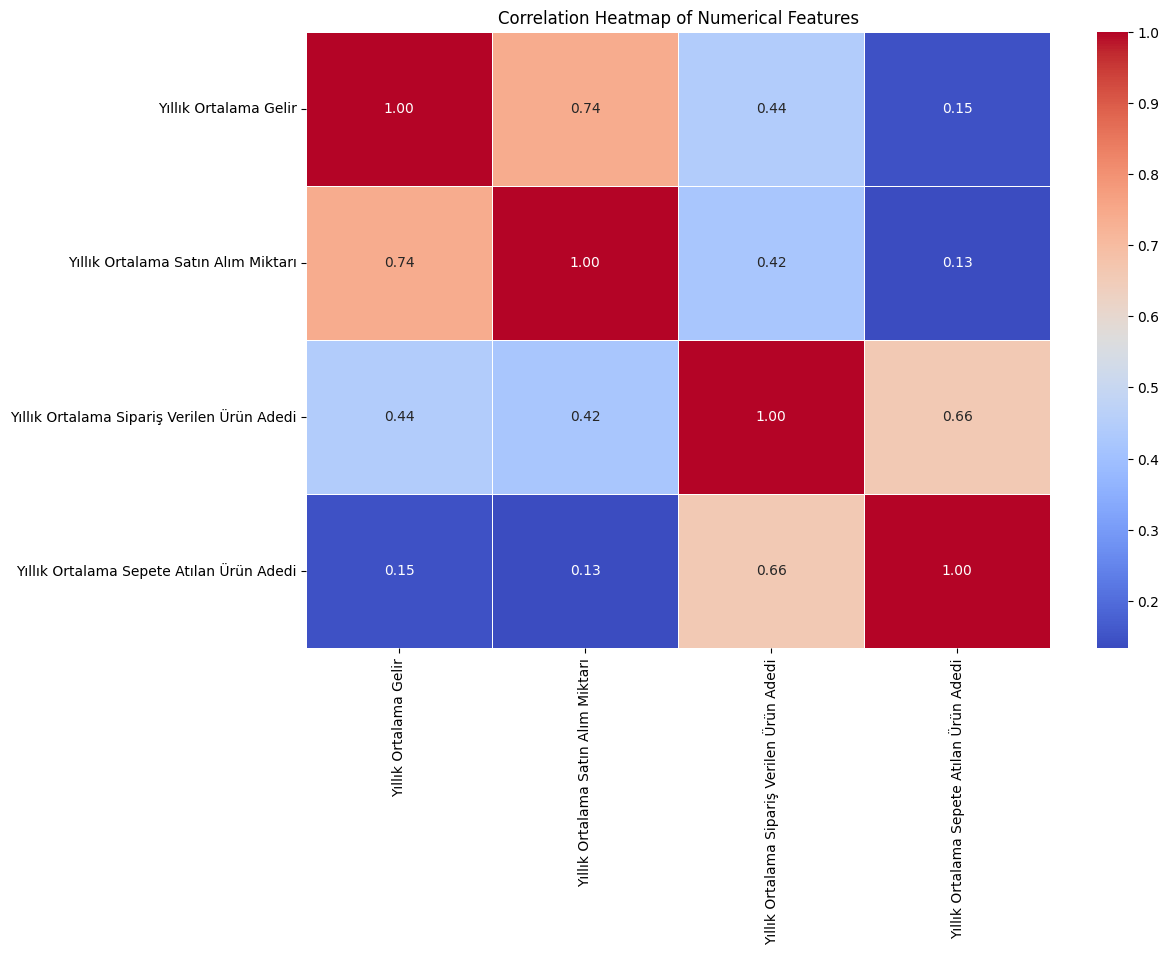

In [71]:
# Korelasyon matrisi oluşturma
correlation_matrix = train_df[numerical_features].corr()

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

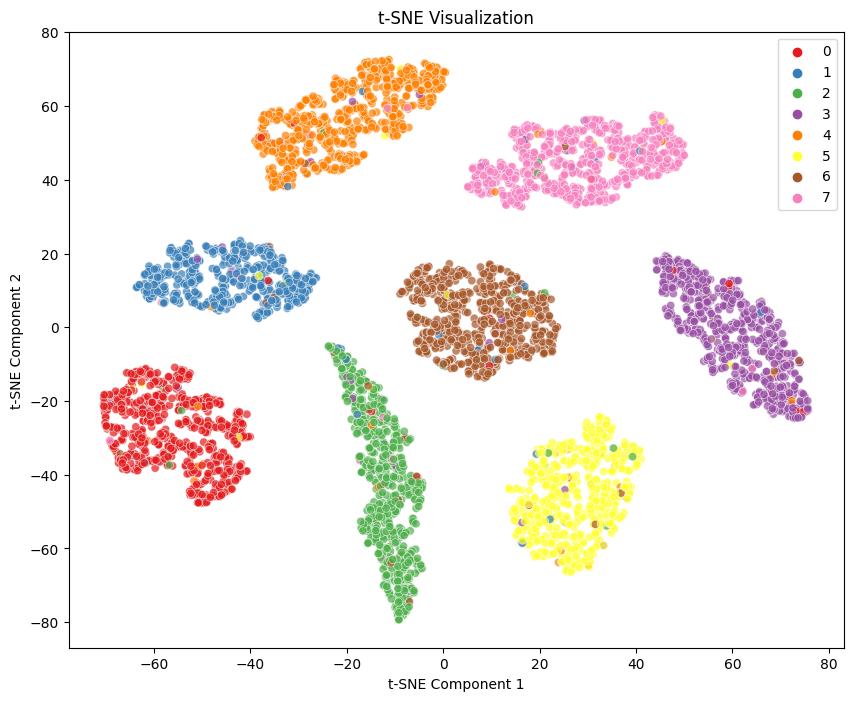

In [83]:
# t-SNE ile veriyi görselleştirme
tsne_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Veriyi normalize etme
data_normalized = (train_df[tsne_features] - train_df[tsne_features].mean()) / train_df[tsne_features].std()

# t-SNE modelini oluşturma
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_normalized)

# t-SNE sonuçlarını DataFrame'e dönüştürme
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Target'] = train_df['Öbek İsmi']

# t-SNE sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Target', data=tsne_df, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.legend()
plt.savefig('result.png')
plt.show()


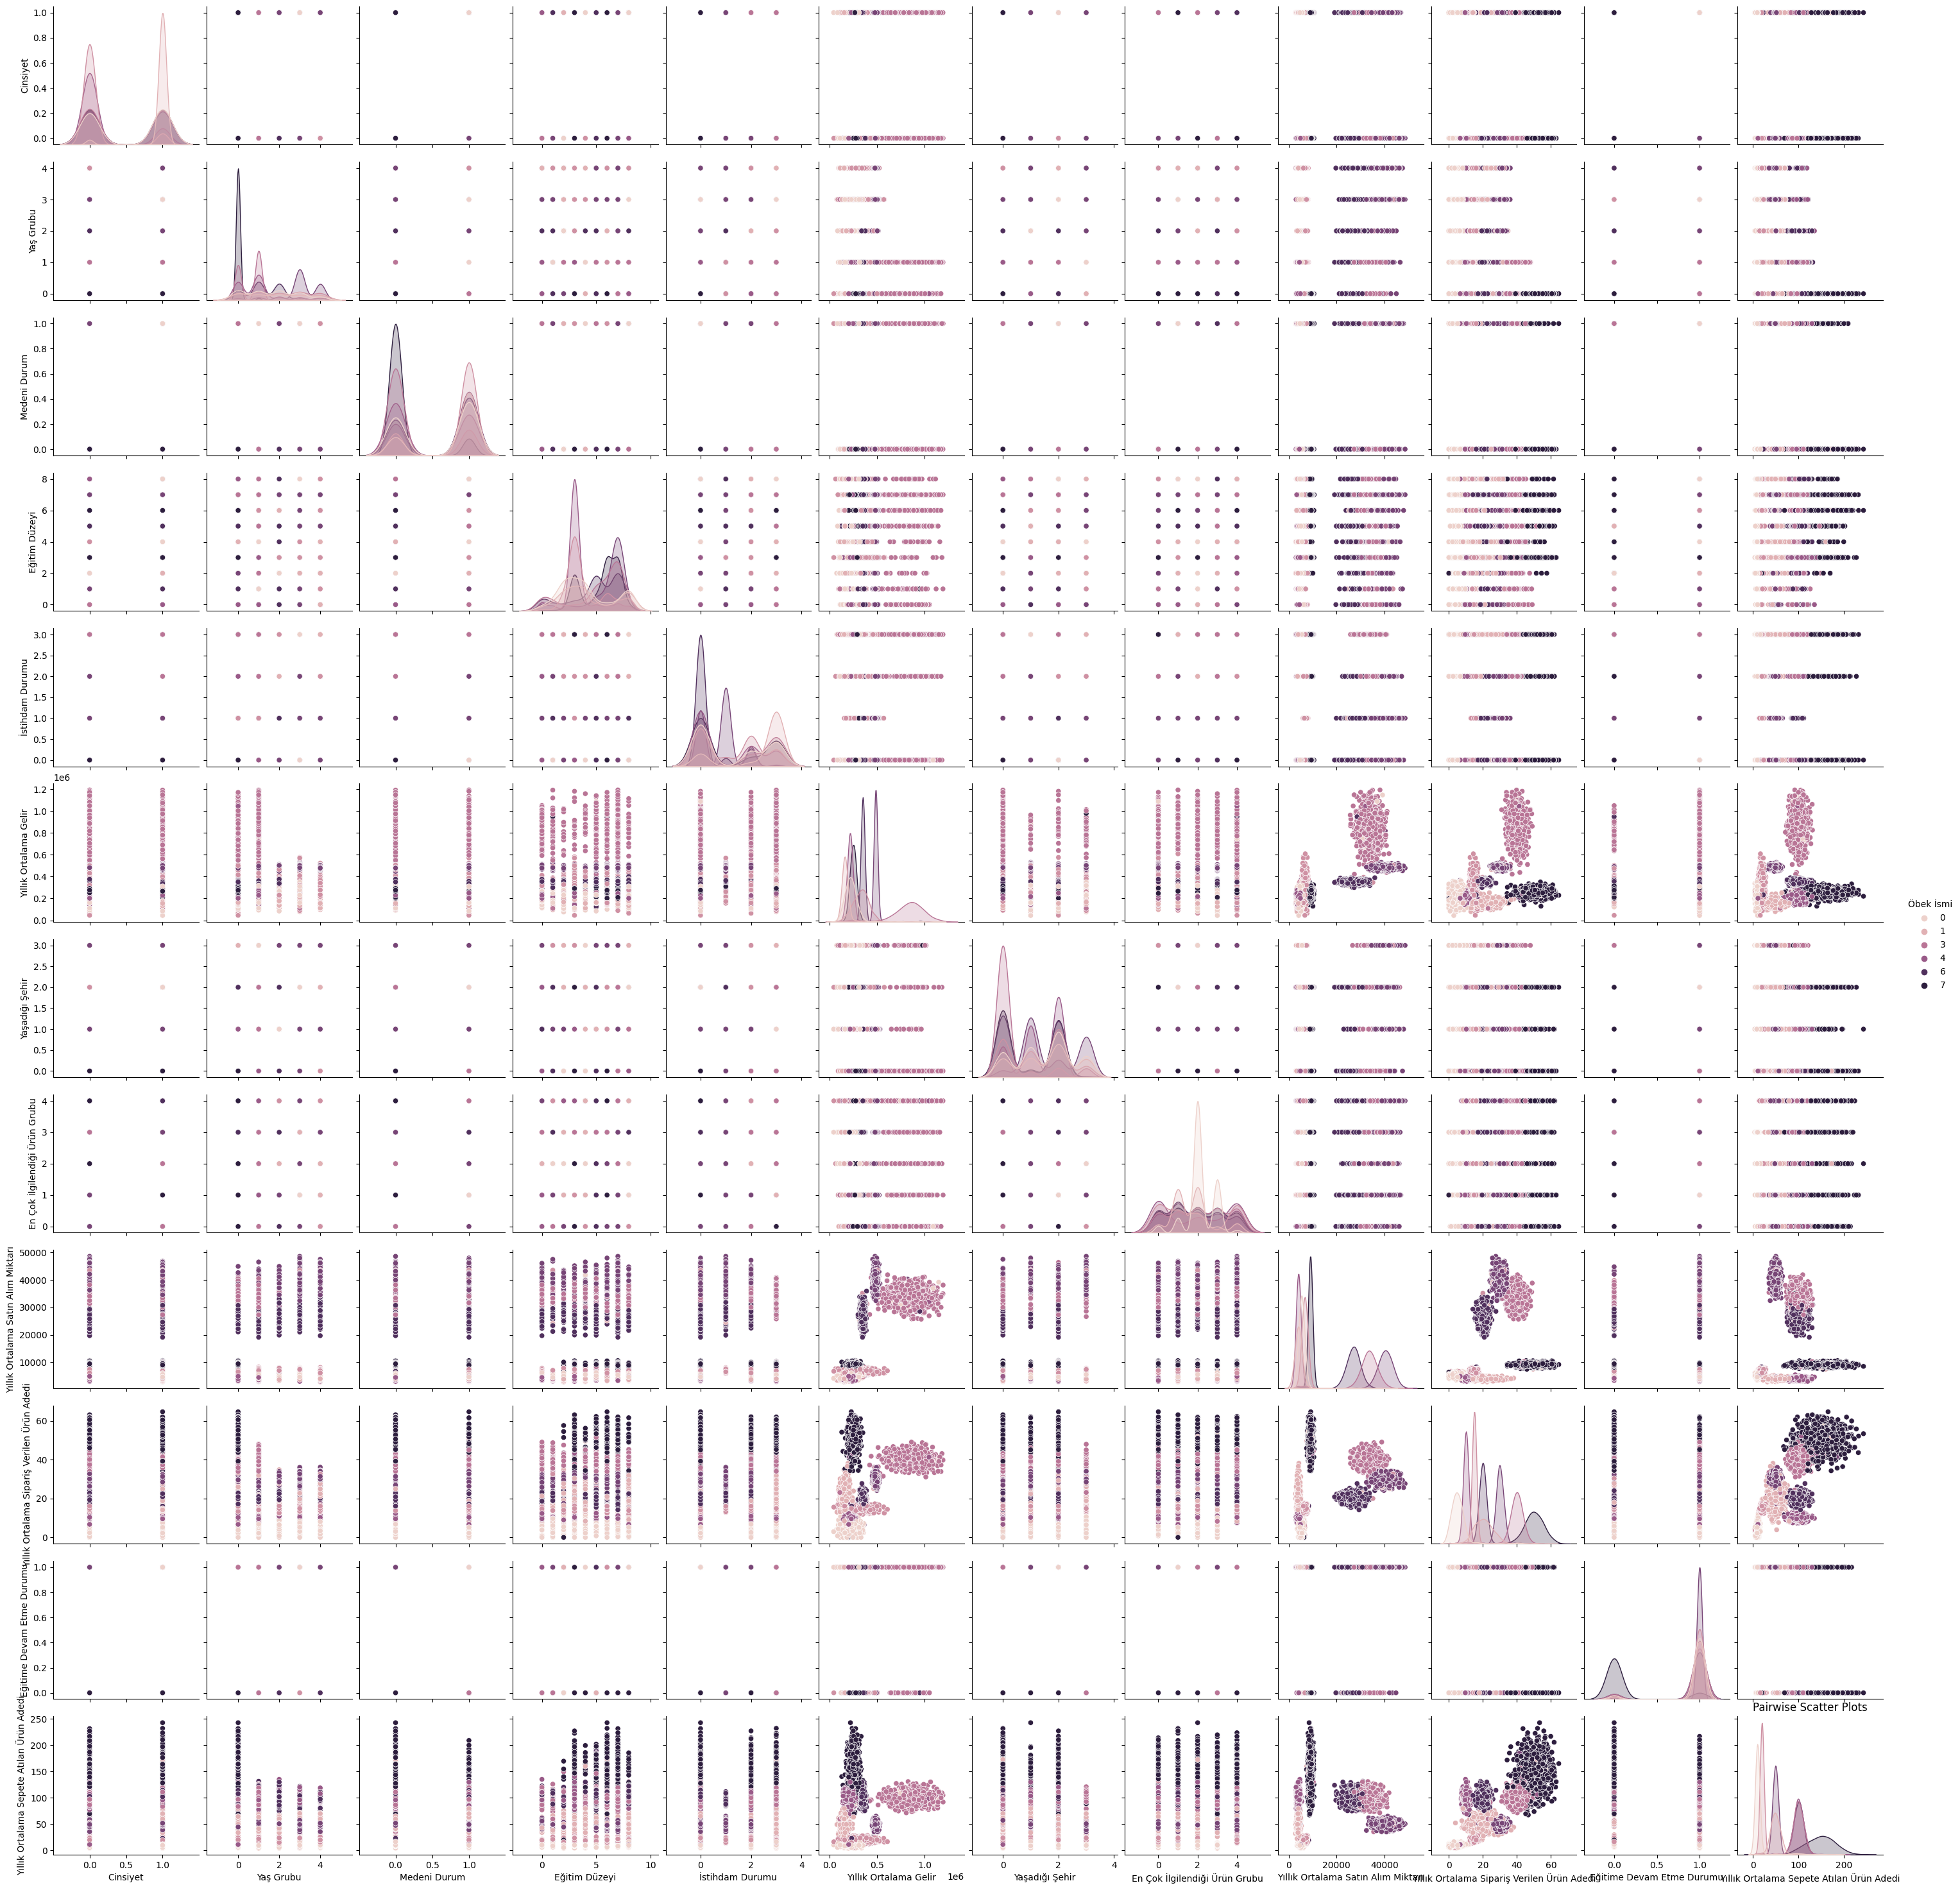

In [84]:
# Veri kümesindeki farklı sayısal özelliklerin çiftli dağılımlarını ve ilişkilerini görselleştiriyoruz.
sns.pairplot(train_df, hue='Öbek İsmi')
plt.title('Pairwise Scatter Plots')
plt.show()

In [72]:
# Eğitim verisinin nasıl şekillendiğini inceliyoruz.
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,3,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,4,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,7,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,2,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,2,20.470459


# Yaptığımız Analizlere Dayanarak Veri Gruplama

**Öbek 1:**
- Genel hatlarıyla lise mezunu veya daha düşük eğitim düzeyine sahipler.
- İşsiz ve düzenli bir işi olmayanlar gelir grafiğinde en altlarda olsa da istisnalara sahipler.
- Giyim ve Kozmetik alanlarına ilgililer.
- Gelir düzeyleri yüksel değil, az alışveriş yapıyorlar. Genelde düşük fiyatlı ürünleri tercih ediyorlar.

Bu özelliklerden çıkarım yaparak onları **Ekonomik Temel Tüketici Grubu** olarak adlandırıyorum.

**Öbek 2:**
- Genel hatlarıyla kadın ve %68'i lise mezunu ve altı.
- %77 gibi bir oranla evliler.
- Çoğunluğu işsiz veya düzenli bir işi yok.
- Yerleşim yerleri dengeli bir biçimde.

Bu özelliklerden çıkarım yaparak onları **Trendsetter Kadınlar Grubu** olarak adlandırıyorum.

**Öbek 3:**
- Çoğunluğunu erkek ve evli kişiler oluşturuyor.
- Kabaca yarısı lise mezunu geri kalanlar ise daha düşük eğitim düzeyine sahipler.
- Gelirlerine göre satın alma düzeyleri düşüklük gösteriyor.
- Büyük çoğunluğu şehirde yaşıyor, istihdam durumları dengeli.

Bu özelliklerden çıkarım yaparak onları **Kentsel Cimri Babalar Grubu** olarak adlandırıyorum.

**Öbek 4:**
- Genellikle bekar, cinsiyet oranı eşit, yaş aralıkları 18-40.
- Yüksek gelir, kentsel yaşam.
- Gelire bağlı olarak yüksek alışveriş oranı.
- Eğitim durumları genel olarak lisans ve üzeri.

Bu özelliklerden çıkarım yaparak onları **Genç Girişimciler Grubu** olarak adlandırıyorum.

**Öbek 5:**
- Genel hatlarını 18-40 yaş erkekler oluşturuyor.
- Gelir düzeyi düşük ve buna bağlı olarak alışveriş oranları düşük. Fakat alışveriş sitelerinde uzun vakit geçiriyorlar.
- Küçük şehir ve kasabalarda yaşam yoğunluklu. Düzenli işi olanlar yoğunlukta.

Bu özelliklerden çıkarım yaparak onları **Yüksek Hedefli Gençler Grubu** olarak adlandırıyorum.

**Öbek 6:**
- Kasaba tarafında yoğunluktalar.
- Gelir düzeyleri orta ve iyi düzeyde.
- Geneli eğitimli ve emekli durumda.
- Gelirlerine bağlı olarak %10 gibi bir alışveriş oranları mevcut.

Bu özelliklerden çıkarım yaparak onları **Konforlu Emekliler Grubu** olarak adlandırıyorum.

**Öbek 7:**
- Yoğunlukla şehirde yaşam, kadın-erkek oranı eşit.
- Yüksek lisans mezunu en yüksek oranda fakat yıllık gelir düzeyleri düşük.
- Alışveriş sitelerinde zaman geçirselerde sipariş oranları %20'ye yakın.

Bu özelliklerden çıkarım yaparak onları **Konforsuz Akademililer Grubu** olarak adlandırıyorum.

**Öbek 8:**
- Çok büyük bir yoğunluğu 18-30 yaş aralığında.
- %86'sı eğitime devam ediyor.
- Çoğunluğu bekar ve gelir düzeyi düşük.
- Alışveriş sitelerinde geçirdiğikleri zaman ve aldıkların ürün miktarları fazla olsa bile satın alım miktarları düşük.

Bu özelliklerden çıkarım yaparak onları **İndirim Kovalayan Öğrenci Grubu** olarak adlandırıyorum.

# Bölüm 5: Model Üzerinde Test Verisi

In [73]:
# RandomForest Classifier'ı başlatma
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Sınıflandırıcıyı eğitme
clf.fit(X_train, y_train)

# Test kümesi üzerinde tahmin yapma
y_pred = clf.predict(X_test)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Sınıflandırma raporu oluşturma
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n      obek_1       1.00      1.00      1.00         7\n      obek_2       1.00      1.00      1.00         7\n      obek_3       1.00      1.00      1.00        11\n      obek_4       1.00      1.00      1.00         6\n      obek_5       1.00      1.00      1.00         6\n      obek_6       1.00      1.00      1.00         3\n      obek_7       1.00      1.00      1.00         9\n      obek_8       1.00      1.00      1.00         6\n\n    accuracy                           1.00        55\n   macro avg       1.00      1.00      1.00        55\nweighted avg       1.00      1.00      1.00        55\n')

Modelimizde ayırdığımız test verisinin oranına göre denemeler yapıyor ve optimum sonuç üzerinde çalışmalar yapıyoruz.

Geçmiş Denemeler ve Sonuçları:

1.0 - 0.01

0.9634464751958225 - 0.07

0.9633699633699634 - 0.1

0.9615384615384616 - 0.2

Yaptığımız denemeler sonucu test verisindeki oranı azalttıkça doğruluk oranında bir artış olduğunu fark ettik ve buna göre optimum sonuç üzerinde yoğunlaştık

In [74]:
# Test kümesi üzerinde yapılan tahminlerin bulunduğu diziyi inceliyoruz.
y_pred

array([1, 0, 0, 6, 7, 4, 1, 0, 2, 4, 0, 2, 1, 0, 1, 3, 6, 6, 6, 7, 3, 3,
       5, 2, 3, 2, 7, 0, 6, 2, 7, 3, 1, 0, 2, 3, 2, 6, 5, 1, 6, 4, 2, 6,
       4, 6, 5, 4, 7, 2, 4, 7, 1, 2, 2])

In [75]:
# Test verisi üzerinde tahmin yapma
test_predictions = clf.predict(test_data_scaled)

# Tahmin sonuçlarını sınıf etiketlerine dönüştürme
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

In [76]:
# Test verisi üzerinde yapılan tahminleri inceliyoruz.
test_predictions

array([2, 2, 1, ..., 6, 4, 5])

# Bölüm 6: Sonuç

In [ ]:
# Tahmin sonuçlarını bir DataFrame'e dönüştürme ve CSV dosyasına kaydetme
submission_df = pd.DataFrame({'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission3.csv', index=False)